## word clouds for songs recalled per song

In [19]:
import pandas as pd

# Load the first CSV file
df1 = pd.read_csv('cols.csv')

# Load the second CSV file
df2 = pd.read_csv('responses.csv')

# Append columns from df2 to df1
df1 = pd.concat([df1, df2], axis=1)

# Save the combined DataFrame to a new CSV file
df1.to_csv('combined_file.csv', index=False)


In [20]:
import pandas as pd
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Read the CSV file into a pandas DataFrame
df = pd.read_csv("combined_file.csv")

# Group the DataFrame by the "Song" column
grouped = df.groupby('Song')

# Iterate over each group and generate word cloud
for song, group in grouped:
    # Concatenate the phrases/lines recalled for each song into a single string
    text = ' '.join(str(line) for line in group['Any lines/phrases/words you recall from the music.'] if pd.notnull(line))
    
    # Generate word cloud
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)
    
    # Plot the word cloud
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title(song)
    plt.axis('off')
    plt.show()


ModuleNotFoundError: No module named 'wordcloud'

## Likeability vs group

In [21]:
import pandas as pd
import matplotlib.pyplot as plt
from textblob import TextBlob

# Load your CSV file into a pandas DataFrame
df = pd.read_csv('combined_file.csv')

# Calculate sentiment scores using TextBlob
# df['Sentiment'] = df['Lyrics'].apply(lambda x: TextBlob(x).sentiment.polarity)

# Splitting the data based on the condition
song_video_match = df['Song'] == df['Video']
df_song = df[song_video_match]
df_video = df[~song_video_match]

# avg_sentiment_song = df_song['Sentiment'].mean()
# avg_sentiment_video = df_video['Sentiment'].mean()
avg_likeability_song = df_song['Rate the overall liking of the song on a scale from 1 to 10.'].mean()
avg_likeability_video = df_video['Rate the overall liking of the song on a scale from 1 to 10.'].mean()

song_video_match = df['Song'] == df['Video']
df_song = df[song_video_match]
df_video = df[~song_video_match]

# Extracting cases where "Did you see the video" is 'Yes' but "Song" is not equal to "Video"
df_video_seen = df[(df['Did you the see the video'] == 'Yes') & (~song_video_match)]

# Calculate average sentiment score and average likeability rating for songs and videos
avg_sentiment_song = df_song['Sentiment'].mean()
avg_sentiment_video = df_video['Sentiment'].mean()
avg_sentiment_video_seen = df_video_seen['Sentiment'].mean()
avg_likeability_song = df_song['Rate the overall liking of the song on a scale from 1 to 10.'].mean()
avg_likeability_video = df_video['Rate the overall liking of the song on a scale from 1 to 10.'].mean()
avg_likeability_video_seen = df_video_seen['Rate the overall liking of the song on a scale from 1 to 10.'].mean()

# Plotting
plt.figure(figsize=(10, 6))

# # Creating bar chart for sentiment scores
# plt.bar(['Song (Sentiment)', 'Video (Sentiment)', 'Video (Seen, Sentiment)'], 
#         [avg_sentiment_song, avg_sentiment_video, avg_sentiment_video_seen], 
#         color=['blue', 'red', 'orange'], label='Sentiment Score')

# Adding another set of bars for likeability ratings
plt.bar(['Song (Likeability)', 'Video (Likeability)', 'Video (Seen, Likeability)'], 
        [avg_likeability_song, avg_likeability_video, avg_likeability_video_seen], 
        color=['lightblue', 'pink', 'salmon'], label='Likeability Rating')

plt.title('Average Likeability Rating')
plt.xlabel('Type')
plt.ylabel('Average Score/Rating')
plt.legend()
plt.grid(axis='y')
plt.show()

TypeError: Could not convert neversometimessometimesfrequentlyneverneverfrequentlyneverneversometimes to numeric

## frequency vs group

### explain previous graph using this one

In [22]:
import pandas as pd
import matplotlib.pyplot as plt
from textblob import TextBlob

# Load your CSV file into a pandas DataFrame
df = pd.read_csv('combined_file.csv')

# Calculate sentiment scores using TextBlob
# df['Sentiment'] = df['Lyrics'].apply(lambda x: TextBlob(x).sentiment.polarity)

# Splitting the data based on the condition
song_video_match = df['Song'] == df['Video']
df_song = df[song_video_match]
df_video = df[~song_video_match]

# avg_sentiment_song = df_song['Sentiment'].mean()
# avg_sentiment_video = df_video['Sentiment'].mean()
avg_likeability_song = df_song['Rate the overall liking of the song on a scale from 1 to 10.'].mean()
avg_likeability_video = df_video['Rate the overall liking of the song on a scale from 1 to 10.'].mean()

song_video_match = df['Song'] == df['Video']
df_song = df[song_video_match]
df_video = df[~song_video_match]

# Extracting cases where "Did you see the video" is 'Yes' but "Song" is not equal to "Video"
df_video_seen = df[(df['Did you the see the video'] == 'Yes') & (~song_video_match)]

# Calculate average sentiment score and average likeability rating for songs and videos
avg_sentiment_song = df_song['Sentiment'].mean()
avg_sentiment_video = df_video['Sentiment'].mean()
avg_sentiment_video_seen = df_video_seen['Sentiment'].mean()
avg_likeability_song = df_song['Rate the overall liking of the song on a scale from 1 to 10.'].mean()
avg_likeability_video = df_video['Rate the overall liking of the song on a scale from 1 to 10.'].mean()
avg_likeability_video_seen = df_video_seen['Rate the overall liking of the song on a scale from 1 to 10.'].mean()

# Plotting
plt.figure(figsize=(10, 6))

# Creating bar chart for sentiment scores
plt.bar(['Song (Sentiment)', 'Video (Sentiment)', 'Video (Seen, Sentiment)'], 
        [avg_sentiment_song, avg_sentiment_video, avg_sentiment_video_seen], 
        color=['blue', 'red', 'orange'], label='Sentiment Score')

# Adding another set of bars for likeability ratings
# plt.bar(['Song (Likeability)', 'Video (Likeability)', 'Video (Seen, Likeability)'], 
#         [avg_likeability_song, avg_likeability_video, avg_likeability_video_seen], 
#         color=['lightblue', 'pink', 'salmon'], label='Likeability Rating')

plt.title('Average Likeability Rating')
plt.xlabel('Type')
plt.ylabel('Average Score/Rating')
plt.legend()
plt.grid(axis='y')
plt.show()

TypeError: Could not convert neversometimessometimesfrequentlyneverneverfrequentlyneverneversometimes to numeric

In [23]:
import nltk
nltk.download('stopwords')
nltk.download('punkt')



[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\anshu\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\anshu\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt.zip.


True

In [24]:
import pandas as pd
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

# Load your CSV file into a pandas DataFrame
df = pd.read_csv('combined_file.csv')

# Define stopwords
stop_words = set(stopwords.words('english'))

# Tokenize and remove stopwords
def preprocess_text(text):
    words = word_tokenize(text.lower())  # Convert to lowercase to make stopwords consistent
    filtered_words = [word for word in words if word.isalnum() and word not in stop_words]
    return len(filtered_words)

# Apply preprocessing to the column
df['Word Count'] = df['Any lines/phrases/words you recall from the music.'].apply(preprocess_text)

# Group by 'column type' and calculate the average word count
average_word_count_by_type = df.groupby('type')['Word Count'].mean()

print(average_word_count_by_type)


AttributeError: 'float' object has no attribute 'lower'

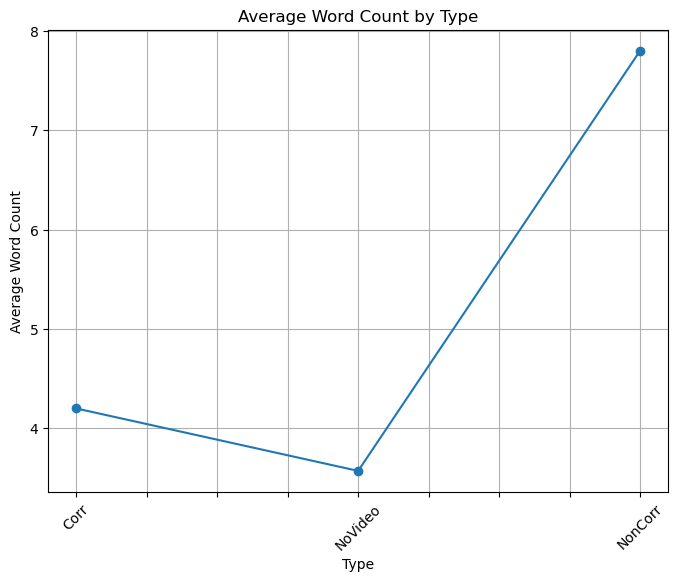

In [ ]:
# Plotting
plt.figure(figsize=(8, 6))
average_word_count_by_type.plot(marker='o')
plt.title('Average Word Count by Type')
plt.xlabel('Type')
plt.ylabel('Average Word Count')
plt.grid(True)
plt.xticks(rotation=45)
plt.show()